Here, we will compare two qualitatively different models of stasis. There is the power-law model from [arxiv.org/abs/2111.04753](https://arxiv.org/abs/2111.04753) described by the 8 parameter family:

$$
\{ \alpha, \gamma, \delta, m_{0}, \Delta m, \Gamma_{0}, \Omega_{0}^{(0)}, t^{(0)} \}
$$

obeying the scalings:

$$
\Gamma_\ell = \left( \frac{m_\ell}{m_0} \right)^\gamma \qquad \Omega_\ell^{(0)} = \left( \frac{m_\ell}{m_0} \right)^\alpha
$$

where $m_\ell = m_0 + (\Delta m) \ell^\delta$. We can analyze this model numerically with the simulation that solves the boltzmann equations:

\begin{equation}
\begin{aligned}
\frac{d \Omega_\ell}{dt} &= H \Omega_\ell \left( 1 - \Omega_M \right) - \Gamma_\ell \Omega_\ell \\[10pt] 
\frac{dH}{dt} &= - \frac{1}{2}H^2\left(4 - \Omega_M \right)
\end{aligned}
\end{equation}

where $\Omega_M = \sum_\ell \Omega_\ell$. After solving the Boltzmann equations, the simulation isolates the number of stasis $e$-folds $\mathcal{N}$ and the abundance about which stasis occurs, $\overline{\Omega}_M$ for a potential stasis epoch. The stasis epoch itself is isolated using a (non-differentiable) sliding-window algorithm. The differentiable stasis finder uses a qualitiatively different algorithm to isolate stasis such that it doesnt interrupt gradient flow when performing gradient ascent or stochastic variational inference.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys

# Add the directory to sys.path
scripts = '../scripts'
sys.path.append(scripts)

from stasis_simulation_non_diff import NonDiffStasisSolver
import warnings
warnings.filterwarnings("ignore")

Figure 2 in [arxiv.org/abs/2111.04753](https://arxiv.org/abs/2111.04753) was generated with $N=300, \alpha = \delta = 1, \gamma = 7, \Delta m / m_0 = 1$, and $\Gamma_{N-1} / H^{(0)} = 0.01$ which together characterize matter-radiation equality (MRE). We can easily produce configurations from the power-law model of stasis using `NonDiffStasisSolver` and by passing `model = 'power-law'`. Lets double check that we can reproduce their plot

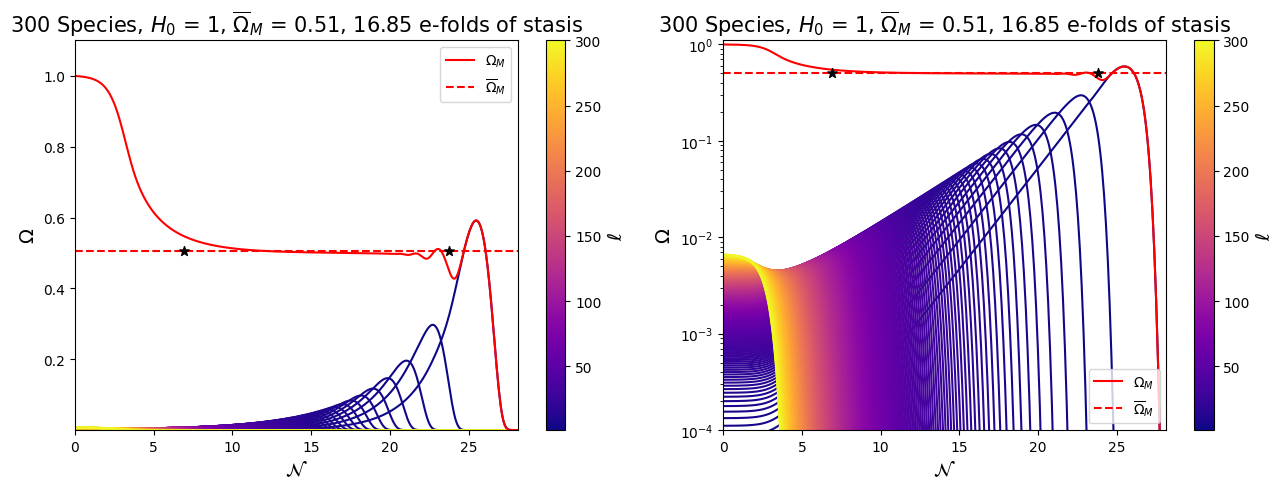

In [3]:
sim = NonDiffStasisSolver(model = 'power-law', alpha = 1, delta = 1, gamma = 7, N = 300, delta_m_m0 = 1, Gamma_N_1_H_0 = .01)
stasis_val, abundance_val = sim.return_stasis()

fig, ax = plt.subplots(1, 2, figsize = (13, 5))

sim.plot_abundance(ax[0])
sim.plot_abundance(logy=True, ax = ax[1]);
plt.tight_layout()

As we can see, we produce their plot exactly. With the power-law model, we see that a stasis epoch with $\mathcal{N} = 17$ $e$-folds is produced with $N =300$ species. We can additionally sanity check the evolution of the scale factor, $a(t)$, and the Hubble parameter, $H(t)$. These methods are also built into the simulation. We expect that $H(t) \sim 1/t$ and that $a(t) \sim t^X$. The exact scaling will depend on the parameter $\kappa = \frac{6}{4 - \overline{\Omega}_M}$.

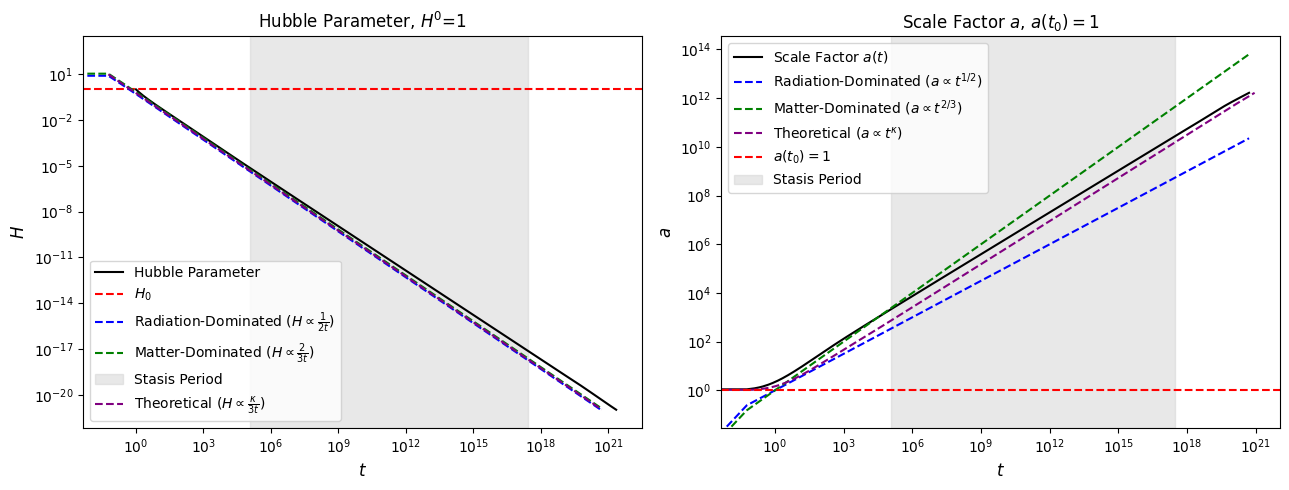

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))

sim.plot_H_t(ax[0])
sim.plot_scale_factor_t(ax[1]);
plt.tight_layout()

As we can see, the overall scaling of $a$ and $H$ is as expected.

Lastly, it is worth illustrating briefly that such a model of stasis is a \emph{global attractor}. One way to illustrate this is by tuning the strength of the inital edge effects, described by the quantity $\Gamma_{N-1} / H^{(0)}$. When this ratio is $\ll 1$, edge effects are mild and the early time decays do not significantly alter the stasis dynamics. In the converse limit, when this ratio is $\gg 1$, we will see that the same stasis state can be achieved, but from \emph{below}.

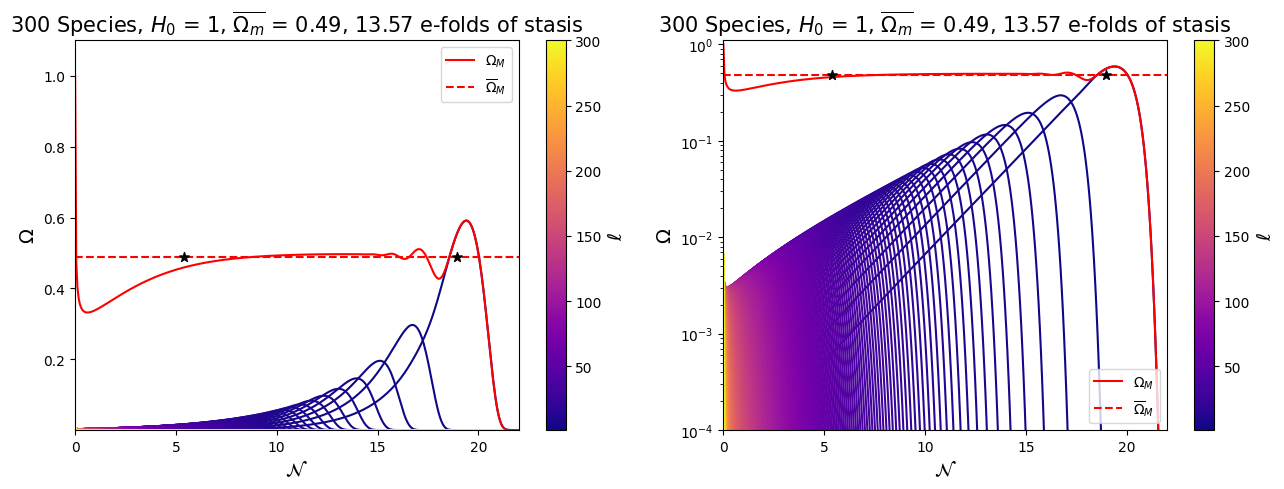

In [37]:
sim = NonDiffStasisSolver(model = 'power-law', alpha = 1, delta = 1, gamma = 7, N = 300, delta_m_m0 = 1, Gamma_N_1_H_0 = 100, H_0=1)
stasis_val, abundance_val = sim.return_stasis()

fig, ax = plt.subplots(1, 2, figsize = (13, 5))

sim.plot_abundance(ax[0])
sim.plot_abundance(logy=True, ax = ax[1]);
plt.tight_layout()

Thus, this model of stasis is an attractor.

We now proceed to analyze our new model of stasis described by the five parameter family

$$
\{ \alpha, \gamma, \Gamma_N, \Omega_N^{(0)}, t^{(0)} \}
$$

which obeys the scalings:

$$
\Gamma_\ell = \Gamma_N e^{\gamma (\ell - N)} \qquad \Omega_\ell^{(0)} = \Omega_N^{(0)} e^{\alpha(\ell - N)}
$$

This model is also easily available in `NonDiffStasisSolver` by calling `model = 'exponential'`. Let's check MRE for this model, where we've shown it corresponds to parameter choices $\gamma = 1$ and $\alpha = 2/7.$

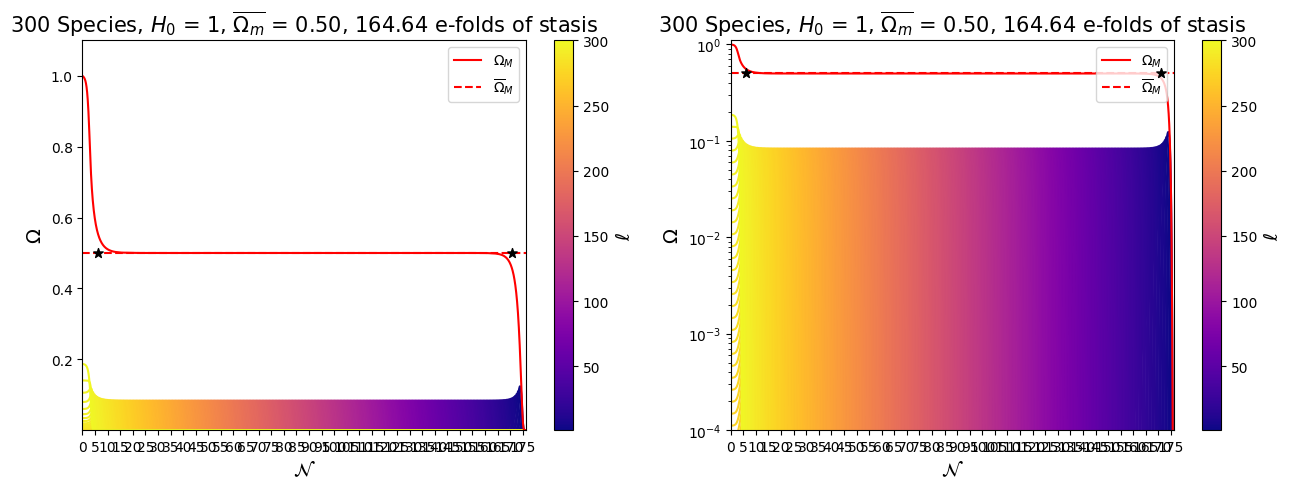

In [38]:
sim = NonDiffStasisSolver(model = 'exponential', alpha = 2/7, gamma = 1, Gamma_N = 0.01, N = 300)
sim.return_stasis()

fig, ax = plt.subplots(1, 2, figsize = (13, 5))

sim.plot_abundance(ax[0])
sim.plot_abundance(logy=True, ax = ax[1]);
plt.tight_layout()

$x$-axes aside, we can see that the exponential model results in $\mathcal{N} = 164$ $e$-folds of MRE stasis, a large discrepancy in $e$-folds compared to the power-law model. We can lastly probe numerically that this model is also a global attractor, by tuning the strength of $\Gamma_N$.

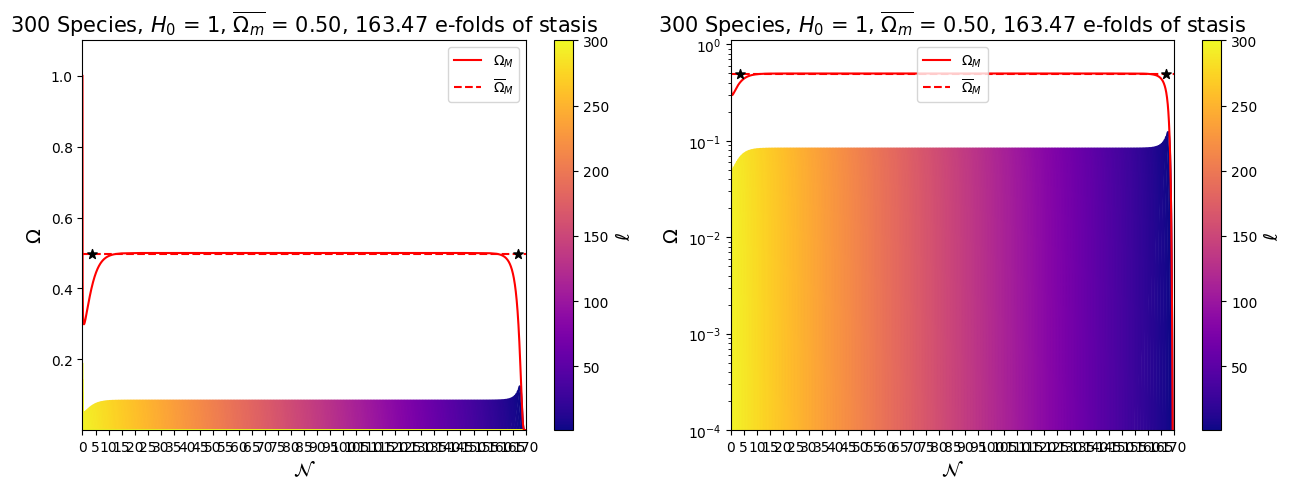

In [39]:
sim = NonDiffStasisSolver(model = 'exponential', alpha = 2/7, gamma = 1, Gamma_N = 100, N = 300)
sim.return_stasis()

fig, ax = plt.subplots(1, 2, figsize = (13, 5))

sim.plot_abundance(ax[0])
sim.plot_abundance(logy=True, ax = ax[1]);
plt.tight_layout()

The inital decays are larger and get cutoff due to the large simulation duration, but we see that the stasis state is achieved from below rather than above. Thus, this model numerically also exhibits attractor behavior.